# Methylation Classifiers

In [1]:
import pandas as pd
import numpy as np
import os 
import gzip
import sys
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
%matplotlib inline

### Reading Data

In [2]:
if os.getcwd() != "/grain/ma107":
    os.chdir("/grain/ma107")
    
feature = pd.read_csv("all_feature_filtered0.12_mult.txt.gz", compression = "gzip", sep = "\t")
meta = pd.read_csv("all_metadata_filtered0.12_mult.txt.gz", compression = "gzip", sep = "\t")
beta = pd.read_csv("all_betavalue_filtered0.12_mult.txt.gz", compression = "gzip", sep = "\t")

In [3]:
#a_file = gzip.open("all_feature_filtered0.12_mult.txt.gz", "rb")
#a_file.read()

### Pre-processing Data

In [4]:
feature.shape, meta.shape, beta.shape

((4923, 2), (6748, 7), (6748, 4924))

In [5]:
feature

,Unnamed: 0,0
0,82,chr1 904372
1,93,chr1 911257
2,449,chr1 1085649
3,591,chr1 1167845
4,728,chr1 1233170
...,...,...
4918,441515,chr22 50526697
4919,441542,chr22 50542692
4920,441582,chr22 50578217
4921,441604,chr22 50582982


In [6]:
meta

,sample_id,sample_id.1,series,platform,disease_name,tissue_name,treatment
0,GSM2892239,GSM2892239,GSE108202,GPL21145,normal,Fallopian Tube,False
1,GSM2892240,GSM2892240,GSE108202,GPL21145,normal,Fallopian Tube,False
2,GSM2892241,GSM2892241,GSE108202,GPL21145,normal,Fallopian Tube,False
3,GSM2892245,GSM2892245,GSE108202,GPL21145,normal,Fallopian Tube,False
4,GSM2892246,GSM2892246,GSE108202,GPL21145,normal,Fallopian Tube,False
...,...,...,...,...,...,...,...
6743,GSM3927206,GSM3927206,GSE133774,GPL21145,normal,Blood,False
6744,GSM3927207,GSM3927207,GSE133774,GPL21145,normal,Blood,False
6745,GSM3927208,GSM3927208,GSE133774,GPL21145,normal,Blood,False
6746,GSM3927209,GSM3927209,GSE133774,GPL21145,normal,Blood,False


In [7]:
beta

,sample_id,"('chr1 904372',)","('chr1 911257',)","('chr1 1085649',)","('chr1 1167845',)","('chr1 1233170',)","('chr1 1294209',)","('chr1 1303417',)","('chr1 1308182',)","('chr1 1347362',)",...,"('chr22 50199372',)","('chr22 50455610',)","('chr22 50456112',)","('chr22 50525727',)","('chr22 50525782',)","('chr22 50526697',)","('chr22 50542692',)","('chr22 50578217',)","('chr22 50582982',)","('chr22 50600291',)"
0,GSM2892239,0.017656,0.023637,0.014527,0.012674,0.029276,0.029857,0.022542,0.019039,0.973354,...,0.984023,0.019543,0.038592,0.983891,0.921848,0.508277,0.974199,0.765883,0.013054,0.137849
1,GSM2892240,0.019247,0.030294,0.013899,0.014918,0.024140,0.016632,0.028565,0.022201,0.981417,...,0.990343,0.021360,0.014946,0.978917,0.978777,0.346187,0.974192,0.816328,0.012662,0.090369
2,GSM2892241,0.017328,0.032483,0.012674,0.017843,0.019764,0.025233,0.037839,0.020234,0.972414,...,0.987666,0.019227,0.084526,0.980802,0.986326,0.615538,0.979289,0.707848,0.015273,0.097920
3,GSM2892245,0.015531,0.025281,0.013331,0.015233,0.022453,0.015652,0.032517,0.022318,0.979329,...,0.990033,0.020472,0.014464,0.982772,0.992001,0.587897,0.961899,0.889982,0.025626,0.066803
4,GSM2892246,0.015882,0.022281,0.011217,0.015187,0.018233,0.015223,0.032616,0.013560,0.976139,...,0.990027,0.022296,0.022045,0.983815,0.988506,0.864098,0.969964,0.788430,0.014864,0.046780
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6743,GSM3927206,0.014836,0.016128,0.011206,0.013187,0.020074,0.016730,0.027200,0.015829,0.982558,...,0.989972,0.014441,0.016043,0.988154,0.993190,0.963289,0.973386,0.864961,0.019413,0.811300
6744,GSM3927207,0.016771,0.021211,0.014542,0.015509,0.025075,0.020579,0.030431,0.021109,0.978925,...,0.973626,0.021014,0.016652,0.985520,0.986176,0.912393,0.961634,0.898364,0.018359,0.829657
6745,GSM3927208,0.017823,0.019214,0.014220,0.017255,0.030698,0.017665,0.039076,0.018353,0.980309,...,0.986342,0.021454,0.019549,0.981708,0.990292,0.947937,0.967589,0.869077,0.028948,0.782288
6746,GSM3927209,0.015101,0.017573,0.014563,0.015781,0.029178,0.015307,0.038167,0.019611,0.979857,...,0.983946,0.022328,0.017201,0.984755,0.986745,0.972845,0.973740,0.891828,0.033507,0.775757


In [8]:
meta.tissue_name.unique()

array(['Fallopian Tube', 'Blood', 'Placenta',
       'Peripheral Blood Mononuclear Cell', 'Breast',
       'Nasal Cavity Epithelium', 'Umbilical Blood', 'Spermatozoon',
       'Brain', 'Liver', 'Leukocyte', 'Melanocyte', 'Adipose Tissue',
       'T-Lymphocyte', 'Fibroblast', 'Saliva', 'Skin', 'Neutrophil',
       'Airway', 'Islet of Langerhans', 'Buccal Mucosa',
       'Vastus Lateralis', 'Muscle', 'Pancreas', 'Bone Marrow',
       'Frontal Lobe Cortex', 'Lymphocyte', 'Lung', 'Esophagus',
       'Monocyte', 'Ovary', 'Prostate Gland', 'Kidney', 'Myoblast',
       'Colon', 'Astrocyte', 'B-Lymphocyte'], dtype=object)

In [9]:
blood_tissues = ["Peripheral Blood Mononuclear Cell", "Monocyte", "Lymphocyte", "B-Lymphocyte", "T-Lymphocyte",
                 "Bone Marrow", "Blood", "Leukocyte", "Neutrophil"]

In [10]:
methyl_data = pd.merge(meta, beta, how = "inner", on = "sample_id")

In [473]:
methyl_data = pd.merge(meta, beta, how = "inner", on = "sample_id")
df = methyl_data.drop(columns = ["sample_id", "sample_id.1", "series", "platform", "disease_name", "treatment"])
df["target"] = methyl_data.tissue_name.apply(lambda x: "Blood" if x in blood_tissues else "Other")
df.drop(columns = ["tissue_name"], inplace = True)

In [393]:
df

,"('chr1 904372',)","('chr1 911257',)","('chr1 1085649',)","('chr1 1167845',)","('chr1 1233170',)","('chr1 1294209',)","('chr1 1303417',)","('chr1 1308182',)","('chr1 1347362',)","('chr1 1361576',)",...,"('chr22 50455610',)","('chr22 50456112',)","('chr22 50525727',)","('chr22 50525782',)","('chr22 50526697',)","('chr22 50542692',)","('chr22 50578217',)","('chr22 50582982',)","('chr22 50600291',)",target
0,0.017656,0.023637,0.014527,0.012674,0.029276,0.029857,0.022542,0.019039,0.973354,0.017048,...,0.019543,0.038592,0.983891,0.921848,0.508277,0.974199,0.765883,0.013054,0.137849,Other
1,0.019247,0.030294,0.013899,0.014918,0.024140,0.016632,0.028565,0.022201,0.981417,0.013845,...,0.021360,0.014946,0.978917,0.978777,0.346187,0.974192,0.816328,0.012662,0.090369,Other
2,0.017328,0.032483,0.012674,0.017843,0.019764,0.025233,0.037839,0.020234,0.972414,0.015689,...,0.019227,0.084526,0.980802,0.986326,0.615538,0.979289,0.707848,0.015273,0.097920,Other
3,0.015531,0.025281,0.013331,0.015233,0.022453,0.015652,0.032517,0.022318,0.979329,0.014981,...,0.020472,0.014464,0.982772,0.992001,0.587897,0.961899,0.889982,0.025626,0.066803,Other
4,0.015882,0.022281,0.011217,0.015187,0.018233,0.015223,0.032616,0.013560,0.976139,0.015201,...,0.022296,0.022045,0.983815,0.988506,0.864098,0.969964,0.788430,0.014864,0.046780,Other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6743,0.014836,0.016128,0.011206,0.013187,0.020074,0.016730,0.027200,0.015829,0.982558,0.009134,...,0.014441,0.016043,0.988154,0.993190,0.963289,0.973386,0.864961,0.019413,0.811300,Blood
6744,0.016771,0.021211,0.014542,0.015509,0.025075,0.020579,0.030431,0.021109,0.978925,0.013621,...,0.021014,0.016652,0.985520,0.986176,0.912393,0.961634,0.898364,0.018359,0.829657,Blood
6745,0.017823,0.019214,0.014220,0.017255,0.030698,0.017665,0.039076,0.018353,0.980309,0.012962,...,0.021454,0.019549,0.981708,0.990292,0.947937,0.967589,0.869077,0.028948,0.782288,Blood
6746,0.015101,0.017573,0.014563,0.015781,0.029178,0.015307,0.038167,0.019611,0.979857,0.012805,...,0.022328,0.017201,0.984755,0.986745,0.972845,0.973740,0.891828,0.033507,0.775757,Blood


In [334]:
pca_df = methyl_data.copy(deep = True)
pca_df = pca_df.drop(columns = ["sample_id", "sample_id.1", "series", "platform", "disease_name", "treatment"])
pca_df["target"] = pca_df.tissue_name.apply(lambda x: x if x in blood_tissues else "Other")
pca_df.drop(columns = ["tissue_name"], inplace = True)
pca_df["target"].unique()

array(['Other', 'Blood', 'Peripheral Blood Mononuclear Cell', 'Leukocyte',
       'T-Lymphocyte', 'Neutrophil', 'Bone Marrow', 'Lymphocyte',
       'Monocyte', 'B-Lymphocyte'], dtype=object)

<Figure size 1080x1080 with 0 Axes>

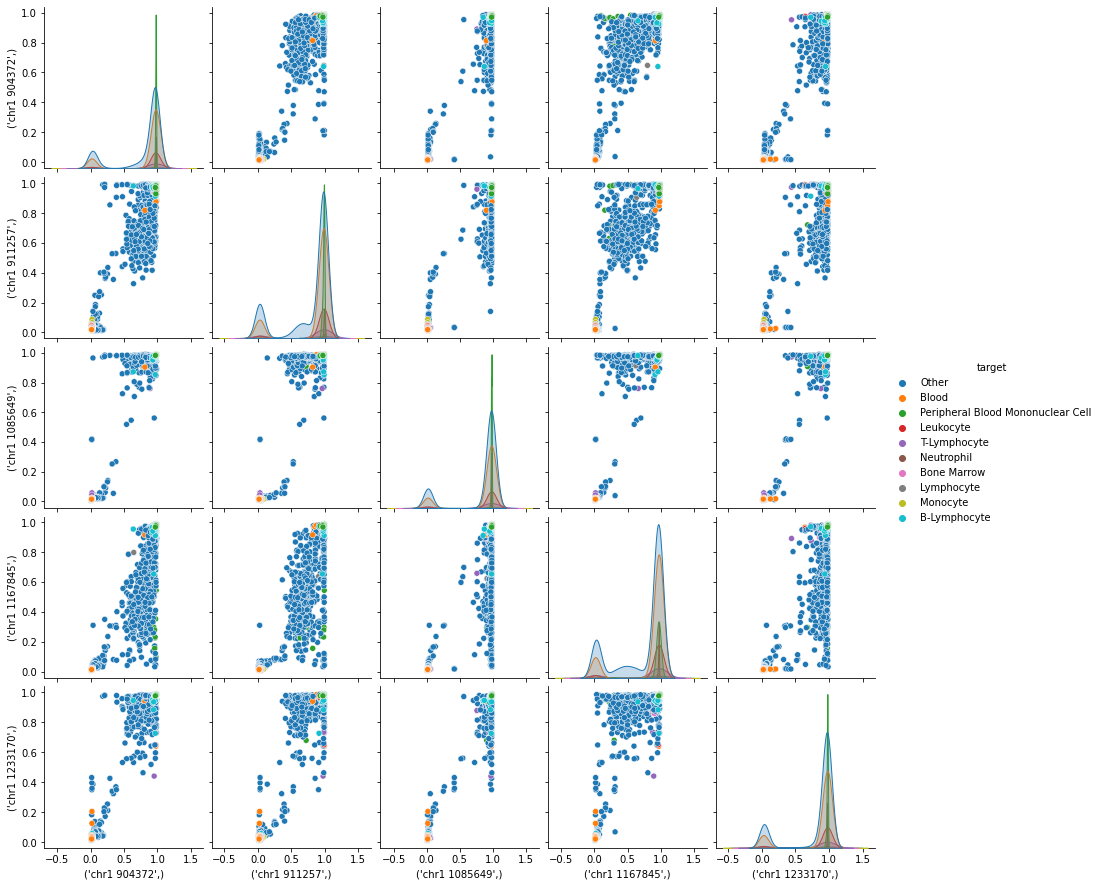

In [336]:
cols = list(df.columns[:5]) + ["target"]
select_df = pca_df[cols]
cat_col = "target"
# # make the figure larger
figure(figsize=(15, 15))
# # scatter plot matrix
sns.pairplot(select_df, hue = cat_col);

In [337]:
df_pca = pca_df.drop(columns = ["target"])
df_pca_stad = (df_pca - df_pca.mean()) / df_pca.std()
from sklearn.decomposition import PCA
pca = PCA(n_components=5) 
your_pca = pca.fit_transform(df_pca_stad) 

In [338]:
sum(pca.explained_variance_ratio_)

0.9032191888806084

In [339]:
pca.explained_variance_ratio_

array([0.65500704, 0.17622028, 0.03538682, 0.02466287, 0.01194219])

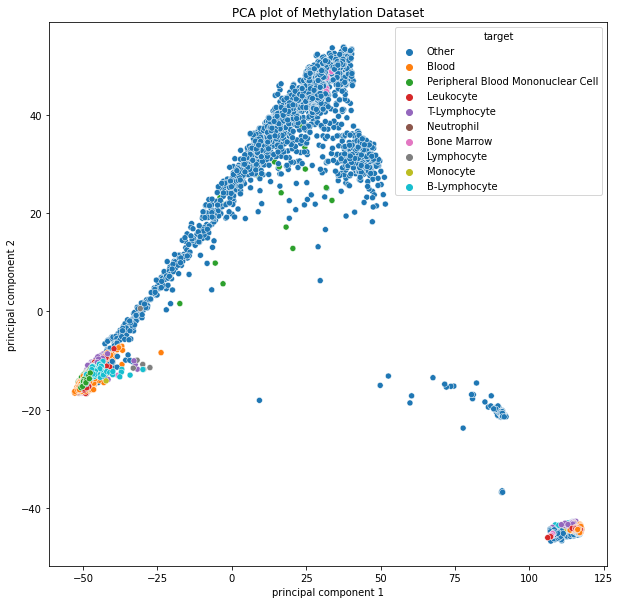

In [432]:
figure(figsize=(10, 10))
sns.scatterplot(x=your_pca[:,0], y=your_pca[:,1], hue = pca_df["target"])
plt.xlabel('principal component 1')
plt.ylabel('principal component 2')
plt.title('PCA plot of Methylation Dataset');

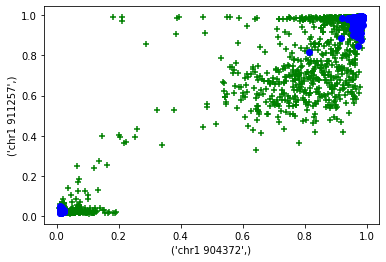

In [17]:
df0 = df[df.target == "Other"]
df1 = df[df.target == "Blood"]
plt.xlabel("('chr1 904372',)")
plt.ylabel("('chr1 911257',)")
plt.scatter(df0["('chr1 904372',)"], df0["('chr1 911257',)"], color="green",marker='+')
plt.scatter(df1["('chr1 904372',)"], df1["('chr1 911257',)"], color="blue",marker='o')

### Binary Classification SVM

In [709]:
x = df.drop(["target"], axis = "columns")
y = df.target

In [710]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [711]:
len(x_train), len(x_test)

(5398, 1350)

In [712]:
from sklearn.svm import SVC

model = SVC(kernel = "linear")
model.fit(x_train, y_train)

SVC(kernel='linear')

In [713]:
model.score(x_test, y_test)

0.9948148148148148

In [714]:
cross_val_score(model, x_train, y_train, cv=5).mean()

0.9940720145539421

In [715]:
model.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'linear',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [716]:
# parameters = {"C":[1, 10]}
# grid = GridSearchCV(estimator = SVC(kernel = "linear"), param_grid = parameters)
# grid.fit(x_train, y_train)

In [717]:
# grid.best_estimator_

In [718]:
predicted = model.predict(x_test)

In [719]:
print(classification_report(y_test, predicted), zero_division = 0)

TypeError: 'zer_division' is an invalid keyword argument for this function

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, predicted), display_labels=model.classes_)
disp.plot(xticks_rotation = 90)
plt.show()

### Multi-class Random Forest 

In [122]:
methyl_data

,sample_id,sample_id.1,series,platform,disease_name,tissue_name,treatment,"('chr1 904372',)","('chr1 911257',)","('chr1 1085649',)",...,"('chr22 50199372',)","('chr22 50455610',)","('chr22 50456112',)","('chr22 50525727',)","('chr22 50525782',)","('chr22 50526697',)","('chr22 50542692',)","('chr22 50578217',)","('chr22 50582982',)","('chr22 50600291',)"
0,GSM2892239,GSM2892239,GSE108202,GPL21145,normal,Fallopian Tube,False,0.017656,0.023637,0.014527,...,0.984023,0.019543,0.038592,0.983891,0.921848,0.508277,0.974199,0.765883,0.013054,0.137849
1,GSM2892240,GSM2892240,GSE108202,GPL21145,normal,Fallopian Tube,False,0.019247,0.030294,0.013899,...,0.990343,0.021360,0.014946,0.978917,0.978777,0.346187,0.974192,0.816328,0.012662,0.090369
2,GSM2892241,GSM2892241,GSE108202,GPL21145,normal,Fallopian Tube,False,0.017328,0.032483,0.012674,...,0.987666,0.019227,0.084526,0.980802,0.986326,0.615538,0.979289,0.707848,0.015273,0.097920
3,GSM2892245,GSM2892245,GSE108202,GPL21145,normal,Fallopian Tube,False,0.015531,0.025281,0.013331,...,0.990033,0.020472,0.014464,0.982772,0.992001,0.587897,0.961899,0.889982,0.025626,0.066803
4,GSM2892246,GSM2892246,GSE108202,GPL21145,normal,Fallopian Tube,False,0.015882,0.022281,0.011217,...,0.990027,0.022296,0.022045,0.983815,0.988506,0.864098,0.969964,0.788430,0.014864,0.046780
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6743,GSM3927206,GSM3927206,GSE133774,GPL21145,normal,Blood,False,0.014836,0.016128,0.011206,...,0.989972,0.014441,0.016043,0.988154,0.993190,0.963289,0.973386,0.864961,0.019413,0.811300
6744,GSM3927207,GSM3927207,GSE133774,GPL21145,normal,Blood,False,0.016771,0.021211,0.014542,...,0.973626,0.021014,0.016652,0.985520,0.986176,0.912393,0.961634,0.898364,0.018359,0.829657
6745,GSM3927208,GSM3927208,GSE133774,GPL21145,normal,Blood,False,0.017823,0.019214,0.014220,...,0.986342,0.021454,0.019549,0.981708,0.990292,0.947937,0.967589,0.869077,0.028948,0.782288
6746,GSM3927209,GSM3927209,GSE133774,GPL21145,normal,Blood,False,0.015101,0.017573,0.014563,...,0.983946,0.022328,0.017201,0.984755,0.986745,0.972845,0.973740,0.891828,0.033507,0.775757


In [123]:
rf = methyl_data.copy(deep = True)
rf["target"] = methyl_data.tissue_name.apply(lambda x: x if x in blood_tissues else "Other")
rf.drop(["tissue_name", "sample_id"], axis = "columns", inplace = True)

In [150]:
from sklearn.preprocessing import LabelEncoder
rf_labels = LabelEncoder()
rf["target_labels"] = rf_labels.fit_transform(rf["target"])
true_labels = rf_labels.classes_
true_labels

array(['B-Lymphocyte', 'Blood', 'Bone Marrow', 'Leukocyte', 'Lymphocyte',
       'Monocyte', 'Neutrophil', 'Other',
       'Peripheral Blood Mononuclear Cell', 'T-Lymphocyte'], dtype=object)

In [125]:
# X = rf.drop('target', axis='columns')
# y = rf.target_labels

In [136]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
import random
series = meta.series.unique()
random.shuffle(series)
holdout_series = list(series[:int(0.2 * len(series))])
train_df = rf.loc[~rf["series"].isin(holdout_series)].copy(deep = True)
test_df = rf.loc[rf["series"].isin(holdout_series)].copy(deep = True)

In [137]:
train_df.drop(columns = ["sample_id.1", "series", "platform", "disease_name", "treatment"], inplace = True)
test_df.drop(columns = ["sample_id.1", "series", "platform", "disease_name", "treatment"], inplace = True)

In [138]:
X_train = np.array(train_df.iloc[:, :4923])
X_test = np.array(test_df.iloc[:, :4923])
y_train = np.array(train_df.iloc[:, 4924])
y_test = np.array(test_df.iloc[:, 4924])

In [139]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=30, criterion="gini")
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=30)

In [140]:
model.score(X_test, y_test)

0.8103658536585366

In [142]:
model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 30,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [143]:
predicted = model.predict(X_test)

In [171]:
print(classification_report(y_test, predicted, zero_division = 1, target_names=['Blood', 'Bone Marrow', 'Leukocyte', 'Lymphocyte',
       'Monocyte', 'Other',
       'Peripheral Blood Mononuclear Cell', 'T-Lymphocyte']))

                                   precision    recall  f1-score   support

                            Blood       0.73      0.96      0.83       470
                      Bone Marrow       1.00      0.00      0.00        12
                        Leukocyte       0.00      0.00      0.00       243
                       Lymphocyte       1.00      0.00      0.00         6
                         Monocyte       0.50      0.25      0.33         4
                            Other       0.98      0.98      0.98       787
Peripheral Blood Mononuclear Cell       0.91      0.91      0.91       118
                     T-Lymphocyte       0.00      1.00      0.00         0

                         accuracy                           0.81      1640
                        macro avg       0.64      0.51      0.38      1640
                     weighted avg       0.76      0.81      0.77      1640



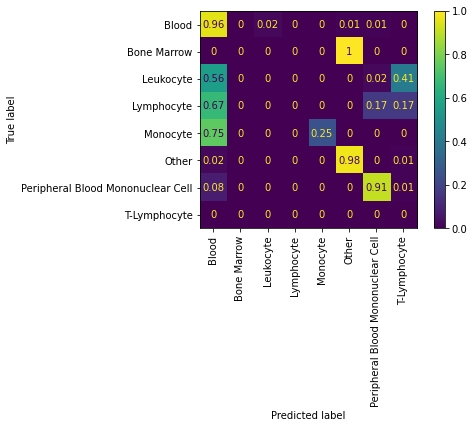

In [170]:
disp = ConfusionMatrixDisplay(np.round(confusion_matrix(y_test, predicted, normalize = 'true'),2), display_labels = ['Blood', 'Bone Marrow', 'Leukocyte', 'Lymphocyte',
       'Monocyte', 'Other',
       'Peripheral Blood Mononuclear Cell', 'T-Lymphocyte'])
disp.plot(xticks_rotation = 90)
plt.show()

### Multi-label SVM

In [174]:
blood_df = methyl_data.copy(deep = True)
blood_df["targets"] = blood_df.tissue_name.apply(lambda x: x if x in blood_tissues else "Other")
blood_df

,sample_id,sample_id.1,series,platform,disease_name,tissue_name,treatment,"('chr1 904372',)","('chr1 911257',)","('chr1 1085649',)",...,"('chr22 50455610',)","('chr22 50456112',)","('chr22 50525727',)","('chr22 50525782',)","('chr22 50526697',)","('chr22 50542692',)","('chr22 50578217',)","('chr22 50582982',)","('chr22 50600291',)",targets
0,GSM2892239,GSM2892239,GSE108202,GPL21145,normal,Fallopian Tube,False,0.017656,0.023637,0.014527,...,0.019543,0.038592,0.983891,0.921848,0.508277,0.974199,0.765883,0.013054,0.137849,Other
1,GSM2892240,GSM2892240,GSE108202,GPL21145,normal,Fallopian Tube,False,0.019247,0.030294,0.013899,...,0.021360,0.014946,0.978917,0.978777,0.346187,0.974192,0.816328,0.012662,0.090369,Other
2,GSM2892241,GSM2892241,GSE108202,GPL21145,normal,Fallopian Tube,False,0.017328,0.032483,0.012674,...,0.019227,0.084526,0.980802,0.986326,0.615538,0.979289,0.707848,0.015273,0.097920,Other
3,GSM2892245,GSM2892245,GSE108202,GPL21145,normal,Fallopian Tube,False,0.015531,0.025281,0.013331,...,0.020472,0.014464,0.982772,0.992001,0.587897,0.961899,0.889982,0.025626,0.066803,Other
4,GSM2892246,GSM2892246,GSE108202,GPL21145,normal,Fallopian Tube,False,0.015882,0.022281,0.011217,...,0.022296,0.022045,0.983815,0.988506,0.864098,0.969964,0.788430,0.014864,0.046780,Other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6743,GSM3927206,GSM3927206,GSE133774,GPL21145,normal,Blood,False,0.014836,0.016128,0.011206,...,0.014441,0.016043,0.988154,0.993190,0.963289,0.973386,0.864961,0.019413,0.811300,Blood
6744,GSM3927207,GSM3927207,GSE133774,GPL21145,normal,Blood,False,0.016771,0.021211,0.014542,...,0.021014,0.016652,0.985520,0.986176,0.912393,0.961634,0.898364,0.018359,0.829657,Blood
6745,GSM3927208,GSM3927208,GSE133774,GPL21145,normal,Blood,False,0.017823,0.019214,0.014220,...,0.021454,0.019549,0.981708,0.990292,0.947937,0.967589,0.869077,0.028948,0.782288,Blood
6746,GSM3927209,GSM3927209,GSE133774,GPL21145,normal,Blood,False,0.015101,0.017573,0.014563,...,0.022328,0.017201,0.984755,0.986745,0.972845,0.973740,0.891828,0.033507,0.775757,Blood


In [175]:
#reverse digraph representation of blood tissue ontology
ontol_tree = {"T-Lymphocyte":"Lymphocyte", "B-Lymphocyte":"Lymphocyte", 
              "Lymphocyte":"Peripheral Blood Mononuclear Cell", "Monocyte":"Peripheral Blood Mononuclear Cell",
              "Peripheral Blood Mononuclear Cell":"Leukocyte", "Neutrophil":"Leukocyte", "Leukocyte":"Blood",
              "Blood":"Bone Marrow"}

In [176]:
def edge_propogation(blood_df):    
    count = 0
    tissues = list(blood_df.targets)
    multiple_classes = [[] for _ in range(len(tissues))]
    for tissue in tissues:
        multiple_classes[count].append(tissue)
        if tissue != "Bone Marrow" and tissue != "Other":
            child = tissue
            while child != "Bone Marrow":
                parent = ontol_tree[child]
                multiple_classes[count].append(parent)
                child = parent
        count += 1
    return multiple_classes

In [177]:
# training_target = edge_propogation(train_df)
# test_target = edge_propogation(test_df)

In [178]:
def edge_labelling(df):
    count = 0
    tissues = list(df.targets)
    multiple_edges = [[] for _ in range(len(tissues))]
    for tissue in tissues:
        if tissue == "Bone Marrow" or tissue == "Other": 
            multiple_edges[count].append((tissue, 0))
        else:
            child = tissue
            parent = ontol_tree[child]
            multiple_edges[count].append((child, parent))
            while parent != "Bone Marrow":                
                child = parent
                parent = ontol_tree[child]
                multiple_edges[count].append((child, parent))
            multiple_edges[count].append((parent, 0))
        count += 1
    return multiple_edges

In [179]:
edge_labels = edge_labelling(blood_df)

In [180]:
paths = [["Other"], ["Bone Marrow"]]
for tissue in ontol_tree:
    path = [tissue]
    if tissue != "Bone Marrow" or tissue != "Other":
        child = tissue
        while child != "Bone Marrow":
            parent = ontol_tree[child]
            path.append(parent)
            child = parent
    paths.append(path)
paths

[['Other'],
 ['Bone Marrow'],
 ['T-Lymphocyte',
  'Lymphocyte',
  'Peripheral Blood Mononuclear Cell',
  'Leukocyte',
  'Blood',
  'Bone Marrow'],
 ['B-Lymphocyte',
  'Lymphocyte',
  'Peripheral Blood Mononuclear Cell',
  'Leukocyte',
  'Blood',
  'Bone Marrow'],
 ['Lymphocyte',
  'Peripheral Blood Mononuclear Cell',
  'Leukocyte',
  'Blood',
  'Bone Marrow'],
 ['Monocyte',
  'Peripheral Blood Mononuclear Cell',
  'Leukocyte',
  'Blood',
  'Bone Marrow'],
 ['Peripheral Blood Mononuclear Cell', 'Leukocyte', 'Blood', 'Bone Marrow'],
 ['Neutrophil', 'Leukocyte', 'Blood', 'Bone Marrow'],
 ['Leukocyte', 'Blood', 'Bone Marrow'],
 ['Blood', 'Bone Marrow']]

In [181]:
edge_labels

[[('Other', 0)],
 [('Other', 0)],
 [('Other', 0)],
 [('Other', 0)],
 [('Other', 0)],
 [('Blood', 'Bone Marrow'), ('Bone Marrow', 0)],
 [('Blood', 'Bone Marrow'), ('Bone Marrow', 0)],
 [('Blood', 'Bone Marrow'), ('Bone Marrow', 0)],
 [('Other', 0)],
 [('Other', 0)],
 [('Other', 0)],
 [('Other', 0)],
 [('Other', 0)],
 [('Other', 0)],
 [('Other', 0)],
 [('Other', 0)],
 [('Other', 0)],
 [('Other', 0)],
 [('Other', 0)],
 [('Other', 0)],
 [('Other', 0)],
 [('Other', 0)],
 [('Other', 0)],
 [('Other', 0)],
 [('Other', 0)],
 [('Other', 0)],
 [('Other', 0)],
 [('Other', 0)],
 [('Other', 0)],
 [('Other', 0)],
 [('Other', 0)],
 [('Other', 0)],
 [('Other', 0)],
 [('Other', 0)],
 [('Other', 0)],
 [('Other', 0)],
 [('Other', 0)],
 [('Other', 0)],
 [('Other', 0)],
 [('Other', 0)],
 [('Other', 0)],
 [('Other', 0)],
 [('Other', 0)],
 [('Other', 0)],
 [('Other', 0)],
 [('Other', 0)],
 [('Other', 0)],
 [('Other', 0)],
 [('Other', 0)],
 [('Other', 0)],
 [('Other', 0)],
 [('Other', 0)],
 [('Other', 0)],
 [(

In [182]:
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()
classes = mlb.fit_transform(edge_labels)
mlb.classes_

array([('B-Lymphocyte', 'Lymphocyte'), ('Blood', 'Bone Marrow'),
       ('Bone Marrow', 0), ('Leukocyte', 'Blood'),
       ('Lymphocyte', 'Peripheral Blood Mononuclear Cell'),
       ('Monocyte', 'Peripheral Blood Mononuclear Cell'),
       ('Neutrophil', 'Leukocyte'), ('Other', 0),
       ('Peripheral Blood Mononuclear Cell', 'Leukocyte'),
       ('T-Lymphocyte', 'Lymphocyte')], dtype=object)

In [183]:
classes_df = pd.DataFrame(classes)
classes_df.columns = [('B-Lymphocyte', 'Lymphocyte'), ('Blood', 'Bone Marrow'),
       ('Bone Marrow', 0), ('Leukocyte', 'Blood'),
       ('Lymphocyte', 'Peripheral Blood Mononuclear Cell'),
       ('Monocyte', 'Peripheral Blood Mononuclear Cell'),
       ('Neutrophil', 'Leukocyte'), ('Other', 0),
       ('Peripheral Blood Mononuclear Cell', 'Leukocyte'),
       ('T-Lymphocyte', 'Lymphocyte')]
blood_edges_df = blood_df.join(classes_df)

In [184]:
blood_edges_df.drop(columns = ["tissue_name", "sample_id", "sample_id.1", "series", "platform", "disease_name", "treatment", "targets"], inplace = True)
blood_edges_df

,"('chr1 904372',)","('chr1 911257',)","('chr1 1085649',)","('chr1 1167845',)","('chr1 1233170',)","('chr1 1294209',)","('chr1 1303417',)","('chr1 1308182',)","('chr1 1347362',)","('chr1 1361576',)",...,"(B-Lymphocyte, Lymphocyte)","(Blood, Bone Marrow)","(Bone Marrow, 0)","(Leukocyte, Blood)","(Lymphocyte, Peripheral Blood Mononuclear Cell)","(Monocyte, Peripheral Blood Mononuclear Cell)","(Neutrophil, Leukocyte)","(Other, 0)","(Peripheral Blood Mononuclear Cell, Leukocyte)","(T-Lymphocyte, Lymphocyte)"
0,0.017656,0.023637,0.014527,0.012674,0.029276,0.029857,0.022542,0.019039,0.973354,0.017048,...,0,0,0,0,0,0,0,1,0,0
1,0.019247,0.030294,0.013899,0.014918,0.024140,0.016632,0.028565,0.022201,0.981417,0.013845,...,0,0,0,0,0,0,0,1,0,0
2,0.017328,0.032483,0.012674,0.017843,0.019764,0.025233,0.037839,0.020234,0.972414,0.015689,...,0,0,0,0,0,0,0,1,0,0
3,0.015531,0.025281,0.013331,0.015233,0.022453,0.015652,0.032517,0.022318,0.979329,0.014981,...,0,0,0,0,0,0,0,1,0,0
4,0.015882,0.022281,0.011217,0.015187,0.018233,0.015223,0.032616,0.013560,0.976139,0.015201,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6743,0.014836,0.016128,0.011206,0.013187,0.020074,0.016730,0.027200,0.015829,0.982558,0.009134,...,0,1,1,0,0,0,0,0,0,0
6744,0.016771,0.021211,0.014542,0.015509,0.025075,0.020579,0.030431,0.021109,0.978925,0.013621,...,0,1,1,0,0,0,0,0,0,0
6745,0.017823,0.019214,0.014220,0.017255,0.030698,0.017665,0.039076,0.018353,0.980309,0.012962,...,0,1,1,0,0,0,0,0,0,0
6746,0.015101,0.017573,0.014563,0.015781,0.029178,0.015307,0.038167,0.019611,0.979857,0.012805,...,0,1,1,0,0,0,0,0,0,0


In [192]:
import random
series = meta.series.unique()
random.shuffle(series)
holdout_series = list(series[:int(0.2 * len(series))])
train_df = blood_edges_df.loc[~blood_df["series"].isin(holdout_series)].copy(deep = True)
test_df = blood_edges_df.loc[blood_df["series"].isin(holdout_series)].copy(deep = True)

In [193]:
X_train = np.array(train_df.iloc[:, :4923])
X_test = np.array(test_df.iloc[:, :4923])
y_train = np.array(train_df.iloc[:, 4923:])
y_test = np.array(test_df.iloc[:, 4923:])

In [26]:
import joblib
sys.modules["sklearn.externals.joblib"] = joblib
from pystruct.learners import OneSlackSSVM
from pystruct.models import MultiLabelClf
clf = OneSlackSSVM(MultiLabelClf())

In [24]:
clf.fit(X_train, y_train)

OneSlackSSVM(model=MultiLabelClf(n_states: 2, inference_method: ad3))

In [27]:
from sklearn.externals import joblib
joblib_file = "multiclass_pystruct_holdout3_edges.pkl"  
joblib.dump(clf, joblib_file)

In [194]:
clf = joblib.load(joblib_file)

In [200]:
clf.get_params()

{'C': 1.0,
 'break_on_bad': False,
 'cache_tol': 'auto',
 'check_constraints': False,
 'inactive_threshold': 1e-05,
 'inactive_window': 50,
 'inference_cache': 0,
 'logger': None,
 'max_iter': 10000,
 'model': MultiLabelClf(n_states: 2, inference_method: ad3),
 'n_jobs': 1,
 'negativity_constraint': None,
 'show_loss_every': 0,
 'switch_to': None,
 'tol': 0.001,
 'verbose': 0}

In [195]:
clf.score(X_test, y_test)

0.9731310942578548

In [197]:
predicted = clf.predict(X_test)

In [198]:
from sklearn.metrics import mean_squared_error
RMSE = mean_squared_error(y_test, predicted)**0.5
RMSE

0.1639173747414995

In [98]:
matrix_labels = ['B-Lymphocyte, Lymphocyte', 'Blood, Bone Marrow',
       'Bone Marrow, 0', 'Leukocyte, Blood',
       'Lymphocyte, Peripheral Blood Mononuclear Cell',
       'Monocyte, Peripheral Blood Mononuclear Cell',
       'Neutrophil, Leukocyte', 'Other, 0',
       'Peripheral Blood Mononuclear Cell, Leukocyte',
       'T-Lymphocyte, Lymphocyte']
print(classification_report(y_test, predicted, zero_division = 0, target_names=matrix_labels))

                                               precision    recall  f1-score   support

                     B-Lymphocyte, Lymphocyte       0.00      0.00      0.00         0
                           Blood, Bone Marrow       1.00      1.00      1.00       852
                               Bone Marrow, 0       1.00      1.00      1.00       852
                             Leukocyte, Blood       1.00      0.74      0.85       429
Lymphocyte, Peripheral Blood Mononuclear Cell       0.43      0.81      0.56        78
  Monocyte, Peripheral Blood Mononuclear Cell       0.00      0.00      0.00         0
                        Neutrophil, Leukocyte       0.00      0.00      0.00         0
                                     Other, 0       1.00      1.00      1.00       622
 Peripheral Blood Mononuclear Cell, Leukocyte       0.38      0.98      0.55        88
                     T-Lymphocyte, Lymphocyte       0.41      0.83      0.55        72

                                    micro

In [199]:
y_test_df = pd.DataFrame(y_test)
predicted_df = pd.DataFrame(predicted)

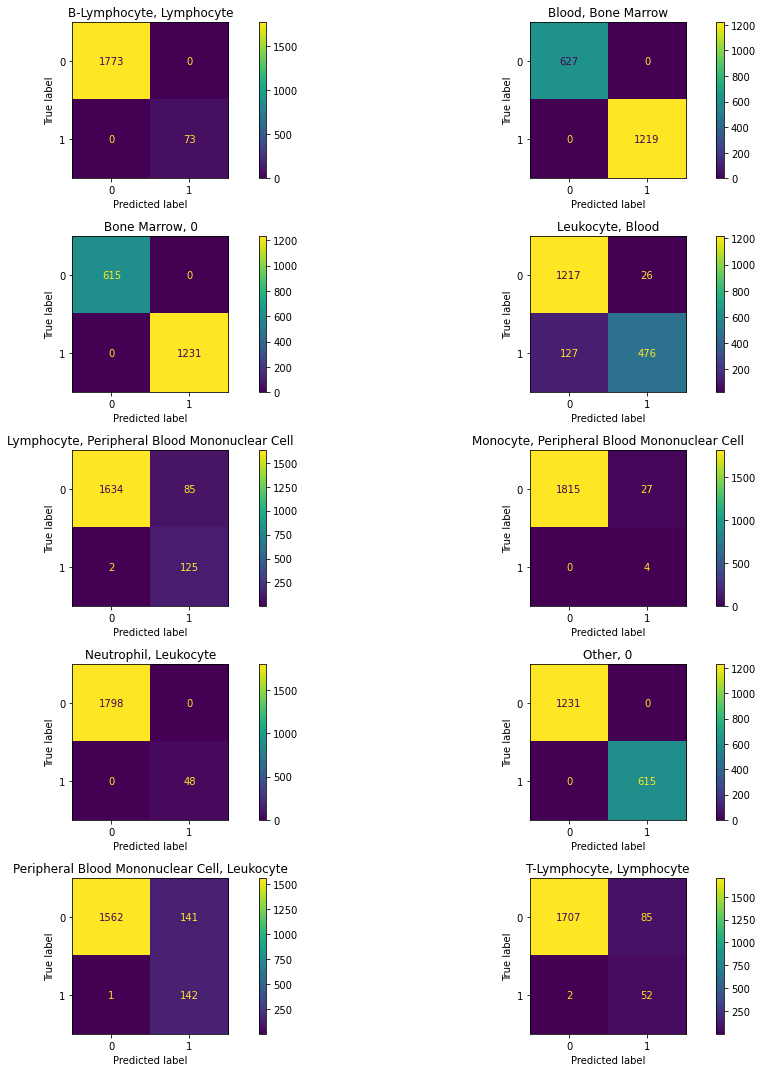

In [219]:
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15,15))

for i, ax in zip(range(10), axes.flatten()):
    disp = ConfusionMatrixDisplay(confusion_matrix(np.array(y_test_df[i]), np.array(predicted_df[i])))
    disp.plot(ax = ax)
    disp.ax_.set_title(matrix_labels[i])

plt.tight_layout()  
plt.show()

### Conditional Random Field

In [260]:
crf_df = methyl_data.copy(deep=True)
crf_df["targets"] = crf_df.tissue_name.apply(lambda x: x if x in blood_tissues else "Other")

In [261]:
import random
series = meta.series.unique()
random.shuffle(series)
holdout_series = list(series[:int(0.3 * len(series))])
train_df = crf_df.loc[~crf_df["series"].isin(holdout_series)].copy(deep = True).reset_index()
test_df = crf_df.loc[crf_df["series"].isin(holdout_series)].copy(deep = True).reset_index()

In [262]:
train_df.drop(columns = ["tissue_name", "sample_id", "sample_id.1", "series", "platform", "disease_name", "treatment"], inplace = True)
test_df.drop(columns = ["tissue_name", "sample_id", "sample_id.1", "series", "platform", "disease_name", "treatment"], inplace = True)
crf_df.groupby(by = "targets").targets.count()

targets
B-Lymphocyte                          102
Blood                                2049
Bone Marrow                            38
Leukocyte                             514
Lymphocyte                             14
Monocyte                               39
Neutrophil                             60
Other                                3229
Peripheral Blood Mononuclear Cell     398
T-Lymphocyte                          305
Name: targets, dtype: int64

In [263]:
def get_features(row, df):
    return dict(df.iloc[row, :])

In [264]:
columns_to_drop = ["index", "targets"]
# ('B-Lymphocyte', 'Lymphocyte'), ('Blood', 'Bone Marrow'),
#        ('Bone Marrow', 0), ('Leukocyte', 'Blood'),
#        ('Lymphocyte', 'Peripheral Blood Mononuclear Cell'),
#        ('Monocyte', 'Peripheral Blood Mononuclear Cell'),
#        ('Neutrophil', 'Leukocyte'), ('Other', 0),
#        ('Peripheral Blood Mononuclear Cell', 'Leukocyte'),
#        ('T-Lymphocyte', 'Lymphocyte'), 

In [265]:
train_temp = train_df.drop(columns = columns_to_drop, inplace = False)
X_train = [[get_features(row, train_temp)] for row in range(len(train_temp))]

In [266]:
test_temp = test_df.drop(columns = columns_to_drop, inplace = False)
X_test = [[get_features(row, test_temp)] for row in range(len(test_temp))]

In [267]:
y_train = [[tissue] for tissue in train_df.targets]
y_test = [[tissue] for tissue in test_df.targets]
# y0 = list(np.array(train_df.iloc[:,-10:]))
# y1 = list(np.array(test_df.iloc[:,-10:]))
# for i in range(len(y0)):
#     y_train.append(list(y0[i]))
# for i in range(len(y1)):
#     y_test.append(list(y1[i]))

In [268]:
%%time
import sklearn_crfsuite
crf = sklearn_crfsuite.CRF(
    algorithm='lbfgs',
    c1=1,
    c2=2,
    max_iterations=200
)
try:
    crf.fit(X_train, y_train)
except AttributeError:
    pass

CPU times: user 3min 34s, sys: 1.27 s, total: 3min 35s
Wall time: 3min 36s


In [ ]:
crf

In [269]:
crf.score(X_test, y_test)

0.7609901835253948

In [270]:
labels = list(crf.classes_)
labels

['Other',
 'Blood',
 'Peripheral Blood Mononuclear Cell',
 'Leukocyte',
 'T-Lymphocyte',
 'Neutrophil',
 'Bone Marrow',
 'Monocyte',
 'Lymphocyte',
 'B-Lymphocyte']

In [271]:
print(classification_report(y_test, crf.predict(X_test), zero_division = 0))

                                   precision    recall  f1-score   support

                     B-Lymphocyte       0.00      0.00      0.00         0
                            Blood       0.81      0.68      0.74      1049
                      Bone Marrow       0.00      0.00      0.00        17
                        Leukocyte       0.00      0.00      0.00        40
                       Lymphocyte       0.00      0.00      0.00         6
                            Other       0.95      0.88      0.92       974
Peripheral Blood Mononuclear Cell       0.81      0.81      0.81       133
                     T-Lymphocyte       0.45      0.83      0.59       124

                         accuracy                           0.76      2343
                        macro avg       0.38      0.40      0.38      2343
                     weighted avg       0.83      0.76      0.79      2343



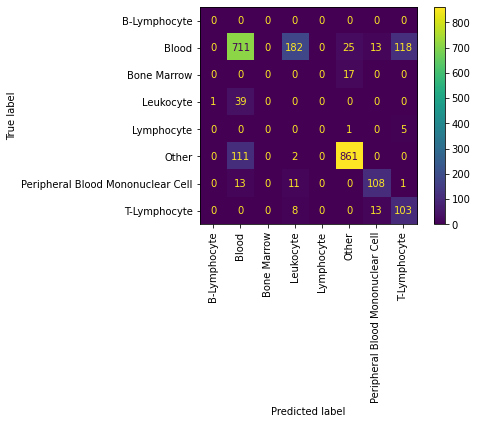

In [278]:
disp = ConfusionMatrixDisplay(np.round(confusion_matrix(y_test, crf.predict(X_test)), 2), display_labels = ["B-Lymphocyte", "Blood", "Bone Marrow", "Leukocyte", "Lymphocyte", "Other", "Peripheral Blood Mononuclear Cell", "T-Lymphocyte"])
disp.plot(xticks_rotation = 90)
plt.show()

In [238]:
crf_df_1 = methyl_data.copy(deep=True)
crf_df_1["targets"] = crf_df_1.tissue_name.apply(lambda x: x if x in blood_tissues else "Other")

In [239]:
def edge_propogation(blood_df):    
    count = 0
    tissues = list(blood_df.targets)
    multiple_classes = [[] for _ in range(len(tissues))]
    for tissue in tissues:
        multiple_classes[count].append(tissue)
        if tissue != "Bone Marrow" and tissue != "Other":
            child = tissue
            while child != "Bone Marrow":
                parent = ontol_tree[child]
                multiple_classes[count].append(parent)
                child = parent
        count += 1
    return multiple_classes

In [240]:
classes = edge_propogation(crf_df_1)
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()
labels = mlb.fit_transform(classes)
mlb.classes_

array(['B-Lymphocyte', 'Blood', 'Bone Marrow', 'Leukocyte', 'Lymphocyte',
       'Monocyte', 'Neutrophil', 'Other',
       'Peripheral Blood Mononuclear Cell', 'T-Lymphocyte'], dtype=object)

In [241]:
classes_df = pd.DataFrame(labels)
classes_df.columns = ['B-Lymphocyte', 'Blood', 'Bone Marrow', 'Leukocyte', 'Lymphocyte',
       'Monocyte', 'Neutrophil', 'Other',
       'Peripheral Blood Mononuclear Cell', 'T-Lymphocyte']
crf_df_1 = crf_df_1.join(classes_df)

In [242]:
import random
series = meta.series.unique()
random.shuffle(series)
holdout_series = list(series[:int(0.3 * len(series))])
train_df = crf_df_1.loc[~crf_df_1["series"].isin(holdout_series)].copy(deep = True).reset_index()
test_df = crf_df_1.loc[crf_df_1["series"].isin(holdout_series)].copy(deep = True).reset_index()

In [243]:
train_df.drop(columns = ["index", "tissue_name", "sample_id", "sample_id.1", "series", "platform", "disease_name", "treatment"], inplace = True)
test_df.drop(columns = ["index", "tissue_name", "sample_id", "sample_id.1", "series", "platform", "disease_name", "treatment"], inplace = True)
crf_df_1.groupby(by = "targets").targets.count()

targets
B-Lymphocyte                          102
Blood                                2049
Bone Marrow                            38
Leukocyte                             514
Lymphocyte                             14
Monocyte                               39
Neutrophil                             60
Other                                3229
Peripheral Blood Mononuclear Cell     398
T-Lymphocyte                          305
Name: targets, dtype: int64

In [244]:
train_temp = train_df.drop(columns = "targets", inplace = False)
X_train = [[get_features(row, train_temp)] for row in range(len(train_temp))]

In [245]:
test_temp = test_df.drop(columns = "targets", inplace = False)
X_test = [[get_features(row, test_temp)] for row in range(len(test_temp))]

In [246]:
def get_y(df, tissue):
    y = []
    for row in range(len(df)):
        if df[tissue][row] == 1:
            x = tissue
        else:
            x = "Not " + tissue 
        y.append([x])
    return y

In [247]:
def indiv_crf(tissue):
    y_train = get_y(train_df, tissue)
    y_test = get_y(test_df, tissue)

    crf = sklearn_crfsuite.CRF(
        algorithm='lbfgs',
        c1=0.5,
        c2=1,
        max_iterations=200
    )
    try:
        crf.fit(X_train, y_train)
    except AttributeError:
        pass

    predicted = crf.predict(X_test)
    
    return crf, crf.score(X_test, y_test) 

In [248]:
crfs = []
for tissue in blood_tissues:
    current_crf, score = indiv_crf(tissue)
    crfs.append(crf)
    print(tissue, ": ", str(score))    

Peripheral Blood Mononuclear Cell :  1.0
Monocyte :  0.997827267789245
Lymphocyte :  1.0
B-Lymphocyte :  1.0
T-Lymphocyte :  1.0
Bone Marrow :  0.993481803367735
Blood :  1.0
Leukocyte :  1.0
Neutrophil :  0.993481803367735


In [254]:
print(classification_report(get_y(test_df, "Monocyte"), crfs[0].predict(X_test), zero_division = 0, labels = ["Monocyte", "Not Monocyte"]))

              precision    recall  f1-score   support

    Monocyte       0.00      0.00      0.00       6.0
Not Monocyte       0.00      0.00      0.00    1835.0

   micro avg       0.00      0.00      0.00    1841.0
   macro avg       0.00      0.00      0.00    1841.0
weighted avg       0.00      0.00      0.00    1841.0

